The versions of the python libraries used to produce results

In [18]:
#%load_ext version_information
#%reload_ext version_information
#%version_information numpy, matplotlib

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.6 64bit [GCC 4.8.2]
IPython 4.2.0
OS Linux 3.13.0 79 generic x86_64 with Ubuntu 14.04 trusty
numpy 1.11.0
matplotlib 1.5.1
Thu Jun 09 09:52:17 2016 EEST

In [ ]:
# To check you version run this cell
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The path to the pegase files

In [2]:
DIR=''
LIST='list'

Read pegase files into dictionary. 
Structure of the file:
- it must have Mgas and Zgas named columns

In [3]:
fobj=open('/home/tadas/RUN_leoA/pegase/cl_colors_0001.dat')
for i, line in zip(range(10), fobj):
    print line.rstrip()
fobj.close()

 time   Mgal      M*       MWD     MBHNS    Msub     Mgas     Zgas   <Z*>mass <Z*>Lbol
    1 .100E+01 .100E+01 .000E+00 .000E+00 .000E+00 .000E+00 .000E+00 .100E-03 .100E-03
    5 .100E+01 .987E+00 .000E+00 .161E-02 .000E+00 .113E-01 .199E+00 .100E-03 .100E-03
   10 .100E+01 .968E+00 .000E+00 .327E-02 .000E+00 .289E-01 .200E+00 .100E-03 .100E-03
   15 .100E+01 .956E+00 .000E+00 .447E-02 .000E+00 .397E-01 .174E+00 .100E-03 .100E-03
   20 .100E+01 .947E+00 .000E+00 .540E-02 .000E+00 .474E-01 .155E+00 .100E-03 .100E-03
   25 .100E+01 .940E+00 .000E+00 .619E-02 .000E+00 .535E-01 .142E+00 .100E-03 .100E-03
   30 .100E+01 .934E+00 .000E+00 .696E-02 .000E+00 .588E-01 .133E+00 .100E-03 .100E-03
   35 .100E+01 .929E+00 .000E+00 .771E-02 .000E+00 .634E-01 .127E+00 .100E-03 .100E-03
   40 .100E+01 .924E+00 .000E+00 .840E-02 .000E+00 .673E-01 .122E+00 .100E-03 .100E-03


In [5]:
DATA={}
Z_LIST=[]
for line in open(DIR+LIST,'r'):
    # deriving metalicity form the file name
    # if the file names are significantly different, this could fail
    z=line.split()[0]
    name=line.split()[1]
    Z_LIST.append(z)
    DATA[z]=genfromtxt(DIR+name,names=True)
    print DIR+line.rstrip()

0.0001 cl_colors_0001.dat
0.0008 cl_colors_0008.dat
0.0016 cl_colors_0016.dat
0.0024 cl_colors_0024.dat
0.0032 cl_colors_0032.dat
0.0040 cl_colors_0040.dat
0.0048 cl_colors_0048.dat
0.0056 cl_colors_0056.dat


Read ages file

In [7]:
AGES=genfromtxt(DIR+'ages.dat')

In [8]:
DAGES=zeros(AGES.size)
DAGES[0]=5.
DAGES[1:]=AGES[1:]-AGES[0:-1]
DAGES[1]=5.
DAGES=DAGES/5.

Calculate differential gas and metalicity evolution

In [9]:
eMGAS={}
eZGAS={}
for key in DATA:
    eMGAS[key]=zeros(DATA[key].size)
    eZGAS[key]=zeros(DATA[key].size)
    eMGAS[key][1:]=DATA[key]['Mgas'][1:]-DATA[key]['Mgas'][:-1]
    eMGAS[key][0]=DATA[key]['Mgas'][0]
    eZGAS[key][1:]=DATA[key]['Mgas'][1:]*DATA[key]['Zgas'][1:]\
    -DATA[key]['Mgas'][:-1]*DATA[key]['Zgas'][:-1]
    eZGAS[key][0]=DATA[key]['Mgas'][0]*DATA[key]['Zgas'][0]

In the Pegase output, after calculation of differential evolution negative values apear, these cannot be passed to the model

In [10]:
Z_TARGET=0.0001 # the lowes alowed metallicity of the returned gas
for key in DATA:
    DEFICIT=0.
    for i in range(eZGAS[key].size):
        if eZGAS[key][i] < Z_TARGET*eMGAS[key][i]:
            print i,DEFICIT,eZGAS[key][i],
            DEFICIT+=abs(eZGAS[key][i]-Z_TARGET*eMGAS[key][i])
            eZGAS[key][i]=Z_TARGET*eMGAS[key][i]
            print DEFICIT,eZGAS[key][i]
        elif eZGAS[key][i] > Z_TARGET*eMGAS[key][i]:
            if DEFICIT > (eZGAS[key][i]-Z_TARGET*eMGAS[key][i]):
                print i,DEFICIT,eZGAS[key][i],
                DEFICIT-=(eZGAS[key][i]-Z_TARGET*eMGAS[key][i])
                eZGAS[key][i]=Z_TARGET*eMGAS[key][i]
                print DEFICIT,eZGAS[key][i]
            elif DEFICIT < (eZGAS[key][i]-Z_TARGET*eMGAS[key][i]):
                print i,DEFICIT,eZGAS[key][i],
                eZGAS[key][i]-=DEFICIT
                DEFICIT=0
                print DEFICIT,eZGAS[key][i]

1 0.0 0.002784 0 0.002784
2 0 0.0036875 0 0.0036875
3 0 0.0012019 0 0.0012019
4 0 0.0005036 0 0.0005036
5 0 0.0002314 0 0.0002314
6 0 0.0002499 0 0.0002499
7 0 0.0002037 0 0.0002037
8 0 0.0001965 0 0.0001965
9 0 0.000177 0 0.000177
10 0 0.0001244 0 0.0001244
11 0 0.0001261 0 0.0001261
12 0 8.51e-05 0 8.51e-05
13 0 0.0001274 0 0.0001274
14 0 0.0001061 0 0.0001061
15 0 7.39e-05 0 7.39e-05
16 0 5.42e-05 0 5.42e-05
17 0 3.51e-05 0 3.51e-05
18 0 0.0001082 0 0.0001082
19 0 1.12e-05 0 1.12e-05
20 0 -6.6e-06 6.77e-06 1.7e-07
21 6.77e-06 6.24e-05 0 5.563e-05
22 0 6.98e-05 0 6.98e-05
23 0 -5.36e-05 5.374e-05 1.4e-07
24 5.374e-05 4.18e-05 1.208e-05 1.4e-07
25 1.208e-05 -2.14e-05 3.358e-05 1e-07
26 3.358e-05 8.52e-05 0 5.162e-05
27 0 -6.3e-06 6.4e-06 1e-07
28 6.4e-06 -8.3e-06 1.48e-05 1e-07
29 1.48e-05 3.99999999999e-07 1.45e-05 1e-07
30 1.45e-05 9.35e-05 0 7.9e-05
31 0 -4.1e-06 4.2e-06 1e-07
32 4.2e-06 5.2e-06 0 1e-06
33 0 3.6e-06 0 3.6e-06
34 0 1.33e-05 0 1.33e-05
35 0 1.19e-05 0 1.19e-05
36 0 1

For consistency check, integrate differential gas and metalicity evolution

In [11]:
iMGAS={}
iZGAS={}
for key in DATA:
    iMGAS[key]=zeros(AGES.shape)
    iZGAS[key]=zeros(AGES.shape)
    idx=1
    for t,ti in zip(DATA[key]['time'],range(DATA[key]['time'].size)):
        if t<AGES[idx]:
            iMGAS[key][idx-1]+=eMGAS[key][ti]
            iZGAS[key][idx-1]+=eZGAS[key][ti]
        elif t >= AGES[idx] and idx+1 < AGES.size:
            idx+=1
            iMGAS[key][idx-1]+=eMGAS[key][ti]
            iZGAS[key][idx-1]+=eZGAS[key][ti]
    iMGAS[key][-1]=iMGAS[key][-2]
    iZGAS[key][-1]=iZGAS[key][-2]

Kompare integrated gas and metalicity evolution with pegase output

In [12]:
for key in Z_LIST:
    fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10),dpi=150)
    ax[0].set_title("Mgas :"+str(sum(iMGAS[key]))+" "+str(DATA[key]['Mgas'][-1]))
    ax[0].plot(DATA[key]['time'],DATA[key]['Mgas'])
    ax[0].plot(AGES,cumsum(iMGAS[key]),"ok",markersize=5)
    ax[0].set_xscale('log')

    ax[1].set_title("Zgas :"+str(sum(iZGAS[key])/sum(iMGAS[key]))[0:5]+" "+str(DATA[key]['Zgas'][-1]))
    ax[1].plot(DATA[key]['time'],DATA[key]['Zgas'])
    ax[1].plot(AGES,cumsum(iZGAS[key])/cumsum(iMGAS[key]),"ok",markersize=5,mfc='none')
    ax[1].set_xscale('log')
    fig.savefig(DIR+key+"_zlist8.png")
    plt.close()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide


Prepare pegase output

In [13]:
MGAS_MATRIX=zeros((AGES.size,len(Z_LIST)))
ZGAS_MATRIX=zeros((AGES.size,len(Z_LIST)))
for zidx, idx in zip(Z_LIST,range(len(Z_LIST))):
    MGAS_MATRIX[:,idx]=iMGAS[zidx]/DAGES
    ZGAS_MATRIX[:,idx]=iZGAS[zidx]/DAGES

Write output files

In [14]:
savetxt(DIR+"MGAS_densez8_a2600.PEGASE",MGAS_MATRIX,fmt="%.5e")
savetxt(DIR+"ZGAS_densez8_a2600.PEGASE",ZGAS_MATRIX,fmt="%.5e")

Check the distribution of metallicities in the output files

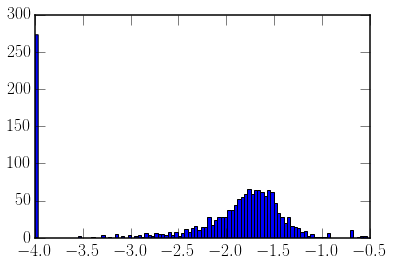

In [15]:
zer=(ZGAS_MATRIX!=0)
zer1=(MGAS_MATRIX!=0)
div=ZGAS_MATRIX[zer]/MGAS_MATRIX[zer]
dump=hist(log10(div.flat),bins=100)